In [1]:
import datajoint as dj

In [2]:
import ephys

Connecting daveliu@mesoscale-activity.datajoint.io:3306


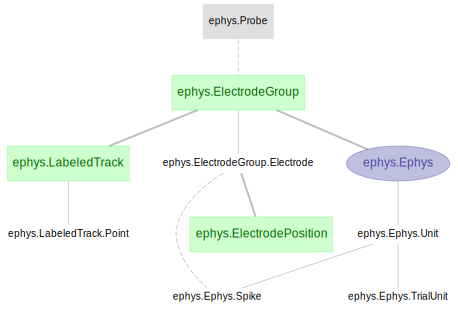

In [3]:
dj.ERD(ephys)

In [ ]:
import scipy.io as spio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
dj.ERD(ephys)-2

In [ ]:
mouse=ephys.experiment.lab.Animal()
#mouse.insert1((123456, '2017-08-01'))
mouse

In [ ]:
dj.ERD(ephys.experiment)

In [ ]:
session=ephys.experiment.Session()
session

In [ ]:
rig=ephys.experiment.lab.Rig()
rig
#rig.insert1(('RRig','Recording Rig'))

In [ ]:
ephys.Probe()

In [ ]:
eGroup=ephys.ElectrodeGroup()

In [ ]:
#eGroup.insert1((123456, 1, 1, '15131808323', 'C:\\Users\\liul.HHMI\\Desktop\\real5ap_imec3_opt3_jrc.mat'))

In [ ]:
eIns=eGroup.fetch1(dj.key) # fetch the dictionary
electrode=eGroup.Electrode()

In [ ]:
electrode

In [ ]:
import h5py
root="C:\\Users\\liul.HHMI\\Desktop\\"
data_file = root + 'real5ap_imec3_opt3_jrc.mat'

In [ ]:
f = h5py.File(data_file,'r')
ind = np.argsort(f['S_clu']['viClu'][0]) # index sorted by cluster
cluster_ids = f['S_clu']['viClu'][0][ind] # cluster (unit) number
spike_times = f['viTime_spk'][0][ind] # spike times
viSite_spk = f['viSite_spk'][0][ind]
viT_offset_file = f['viT_offset_file'][:] # start of each trial
spike_trials = np.ones(len(spike_times)) * (len(viT_offset_file) - 1)
spike_times2 = np.copy(spike_times)

In [ ]:
a = np.array([1, 2, 3])
b = np.copy(a)
b[a>1]=b[a>1]-1
#a

In [ ]:
b

In [ ]:
viT_offset_file[1]

In [ ]:
spike_times[(spike_times >= viT_offset_file[1]) & (spike_times < viT_offset_file[3-1])]

In [ ]:
plt.plot(spike_times[(spike_times >= viT_offset_file[1]) & (spike_times < viT_offset_file[3-1])])

In [ ]:
for i in range(len(viT_offset_file) - 1, 0, -1): #find the trials each unit has a spike in
    spike_trials[spike_times < viT_offset_file[i]] = i - 1 # Get the trial number of each spike
    spike_times2[(spike_times >= viT_offset_file[i-1]) & (spike_times < viT_offset_file[i])] = spike_times[(spike_times >= viT_offset_file[i-1]) & (spike_times < viT_offset_file[i])] - viT_offset_file[i-1] # subtract the viT_offset_file from each trial
spike_times2[spike_times >= viT_offset_file[-1]] = spike_times[spike_times >= viT_offset_file[-1]] - viT_offset_file[-1] # subtract the viT_offset_file from each trial

sRateHz = f['P']['sRateHz'][0]
clu_ids_diff = np.diff(cluster_ids)
clu_ids_diff = np.where(clu_ids_diff != 0)[0] + 1
units = np.split(spike_times, clu_ids_diff)
trialunits = np.split(spike_trials, clu_ids_diff) # sub arrays of spike_trials
unit_ids = np.arange(len(clu_ids_diff)+1)
trialunits1=[]
trialunits2=[]
for i in range(0,len(trialunits)):
    trialunits2 = np.append(trialunits2, np.unique(trialunits[i]))
    trialunits1 = np.append(trialunits1, np.zeros(len(np.unique(trialunits[i])))+i)

In [ ]:
plt.plot(spike_trials[1:10],'.')

In [ ]:
plt.plot(spike_times2[1:10],'.')

In [ ]:
len(cluster_ids)

In [ ]:
min(trialunits2)

In [ ]:
len(cluster_ids[cluster_ids==6])

In [ ]:
session.Trial() & 'animal =123456 '

In [ ]:
ephys1=ephys.Ephys()

In [ ]:
ephys1.populate()

In [ ]:
ephys1.delete()

In [ ]:
spike=ephys1.Spike()

In [ ]:
unit1=(spike & 'unit = 80').fetch('spike_time','trial')

In [ ]:
np.size(unit1)

In [ ]:
unit1=(spike & 'unit = 24').fetch('spike_time','trial')
plt.subplot(211)
plt.plot(unit1[0],unit1[1],'.')
psth=np.histogram(np.asarray(unit1[0], dtype='float'),100)
plt.subplot(212)
psth[0]
plt.plot(psth[0])

In [ ]:
spike

In [ ]:
behaviorTrial = ephys.experiment.BehaviorTrial()

In [ ]:
outcome = behaviorTrial.fetch('outcome', order_by='session')
early_lick = behaviorTrial.fetch('early_lick', order_by='session')

In [ ]:
data = np.zeros(len(outcome))
data1 = np.zeros(len(early_lick))

In [ ]:
data[outcome=='hit'] = 1
data1[early_lick=='early'] = 1

In [ ]:
trial_note = trialNote.fetch('trial_note', order_by='session')
results = list(map(int, trial_note))
protDiff = np.diff(results)
protChange = np.where(protDiff != 0)

In [ ]:
def movingaverage (values, window):
    weights = np.repeat(1.0, window)/window
    sma = np.convolve(values, weights, 'valid')
    return sma

In [ ]:
yMA = movingaverage(data,20)
plt.plot(yMA)
plt.xlabel('Trials')
plt.ylabel('Proportion Correct')
for i in range(0, len(protChange[0])):
    plt.axvline(protChange[0][i], linewidth=4, color='r')

In [ ]:
yMA = movingaverage(data1,20)
plt.plot(yMA)
plt.xlabel('Trials')
plt.ylabel('Early Licks')
for i in range(0, len(protChange[0])):
    plt.axvline(protChange[0][i], linewidth=4, color='r')

In [ ]:
ephys.experiment.ActionEvent()